<a href="https://colab.research.google.com/github/LocoBunny04/ACMP2000-Data-ML/blob/main/Kawinthida_Haase_fourier_submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import math
import matplotlib.pyplot as plt
import numpy as np

def decompose_signal(x):
    """
    Convert from the time domain to the frequency domain.
    Return the real and imaginary part of the frequency domain
    for the signal contained in x. The signal should contain
    an even number of samples.
    """

    # number of samples in the signal
    N = len(x)

    # initialize the vectors containing cosine and sine coefficients
    reX = np.array([0.0] * (N // 2 + 1))
    imX = np.array([0.0] * (N // 2 + 1))

    # perform the decomposition by correlating the signal
    # to waves of increasing frequency
    n = np.arange(N)
    k = np.arange(N // 2 + 1).reshape((N // 2 + 1, 1))
    angle = 2 * np.pi * k * n / N

    reX = np.dot(np.cos(angle), x)
    imX = np.dot(np.sin(angle), x)

    # scale the coefficients
    scaled_reX = reX / (N // 2)
    scaled_imX = imX / (N // 2)
    scaled_reX[0] /= 2
    scaled_reX[-1] /= 2

    return scaled_reX, scaled_imX


In [99]:
def peak_finder(magnitude, sampling_rate, n):
  """
  Steps:
  Find the top 'n' peaks (highest values) within the spectrum
  and return their corresponding frequencies.

  Parameters of the code:
  magnitude: The magnitude part of the spectrum.
  sampling_rate: An int that corresponds with the sampling rate of the signal.
  n: an int number corresponds to reuturned tops peaks.

  Returns:
  list: tuples, a sorted descending order of each tuple thar contains
  the frequency and magnitude of a peak,
    """
  # --- Step 1: Calculate Frequency ---
  N = len(magnitude) * 2  # change N based on the length of magnitude
  T = 1 / sampling_rate    # time between samples
  frequencies = np.arange(N) / (N * T)
  half_N = N // 2
  frequencies_half = frequencies[:half_N]  # only the first half of the FFT is unique
  # --- Step 2: Find indices of the top n magnitude peaks ---
  # efficient way to find the indices of the top n largest values in your FFT
  top_indices = np.argpartition(magnitude, -n)[-n:]
  top_indices = top_indices[np.argsort(magnitude[top_indices])[::-1]]  # sort descending
  # --- Step 3: Collect the top frequencies and magnitudes ---
  top_peaks = [(frequencies_half[i], magnitude[i]) for i in top_indices]

  return top_peaks

In [100]:
def synthesize_signal(reX, imX):
    """
    Synthesize the signal from the frequency domain to the time domain.
    """

    # determine the dimension of the signal
    N = len(reX) * 2 - 2

    # synthesize the signal back
    k = np.arange(len(reX)).reshape((len(reX), 1))
    i = np.arange(N)
    angle = 2 * np.pi * k * i / N

    real_part = np.dot(reX, np.cos(angle))
    imag_part = np.dot(imX, np.sin(angle))

    signal = (real_part + imag_part)

    return signal


In [101]:
def rectangular2Polar(reX, imX):
    """
    Convert the cosine and sine coefficients to magnitude
    and phase
    """

    magnitude = np.sqrt((reX**2 + imX**2))

    phase = np.arctan(imX / reX)

    return magnitude, phase


In [102]:
def plot_spectrum(magnitude, sampling_rate=1.0, max_x=1000):
    """
    Plot the spectrum of a signal given the magnitude array.

    Parameters:
    magnitude (numpy.ndarray): contains the magnitude.
    sampling_rate (float): The sampling rate of the original signal.
    """

    N = len(magnitude)
    T = 1 / sampling_rate
    frequencies = np.arange(N) / (N * T)
    half_N = N // 2
    magnitude_half = magnitude[:half_N]
    frequencies_half = frequencies[:half_N] / 2

    # Ensure the arrays are of the same length
    if len(magnitude_half) != len(frequencies_half):
        raise ValueError("Length of magnitude_half and frequencies_half must be the same")

    # Ensure the arrays are 1-dimensional
    magnitude_half = np.asarray(magnitude_half).flatten()
    frequencies_half = np.asarray(frequencies_half).flatten()

    plt.figure(figsize=(10, 6))
    plt.stem(frequencies_half, magnitude_half)
    plt.title('Spectrum of the Signal')
    plt.xlabel('Frequency (Hz)' if sampling_rate != 1.0
               else 'Normalized Frequency')
    plt.ylabel('Magnitude')
    plt.grid(True)

    # Set the x-axis limit if max_x is specified
    if max_x is not None:
        plt.xlim(0, max_x)
    plt.show()


In [103]:
def plot_waves(waves, title, color, n, minY, maxY):
  """
  Plot a list of waves (cosine or sine) of increasing frequency.

  Parameters:
  waves: the list of lists containing the waves.
  title: the title of the plot
  color: color of the plot
  n: the number of samples
  minY: the minimum value of the y-axis
  maxY: the maximum value of the y-axis
  """

  # plot the waves
  num_cols = 3
  num_rows = (len(waves) + num_cols - 1) // num_cols
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
  fig.suptitle(title)

  for i, wave in enumerate(waves):
    row, col = divmod(i, num_cols)
    axs[row, col].plot(x, wave,
                       color=color) # plot the wave with a given frequency
    axs[row, col].scatter(np.linspace(0, n - 1, n),
                          wave[np.linspace(0, len(wave)-1, n,
                                           dtype=int)], color=color,
                          marker="s") # highlight integers
    axs[row, col].set_title(f'{title} {i}')

    # Set the y-axis limits for the current subplot
    axs[row, col].set_ylim(minY, maxY)

  plt.tight_layout()
  plt.show()

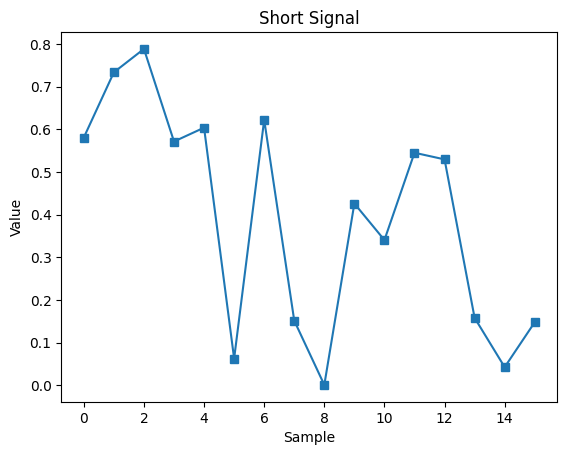

In [104]:
short_signal = np.random.rand(16)

plt.plot(short_signal, marker="s")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.title("Short Signal")
plt.show()

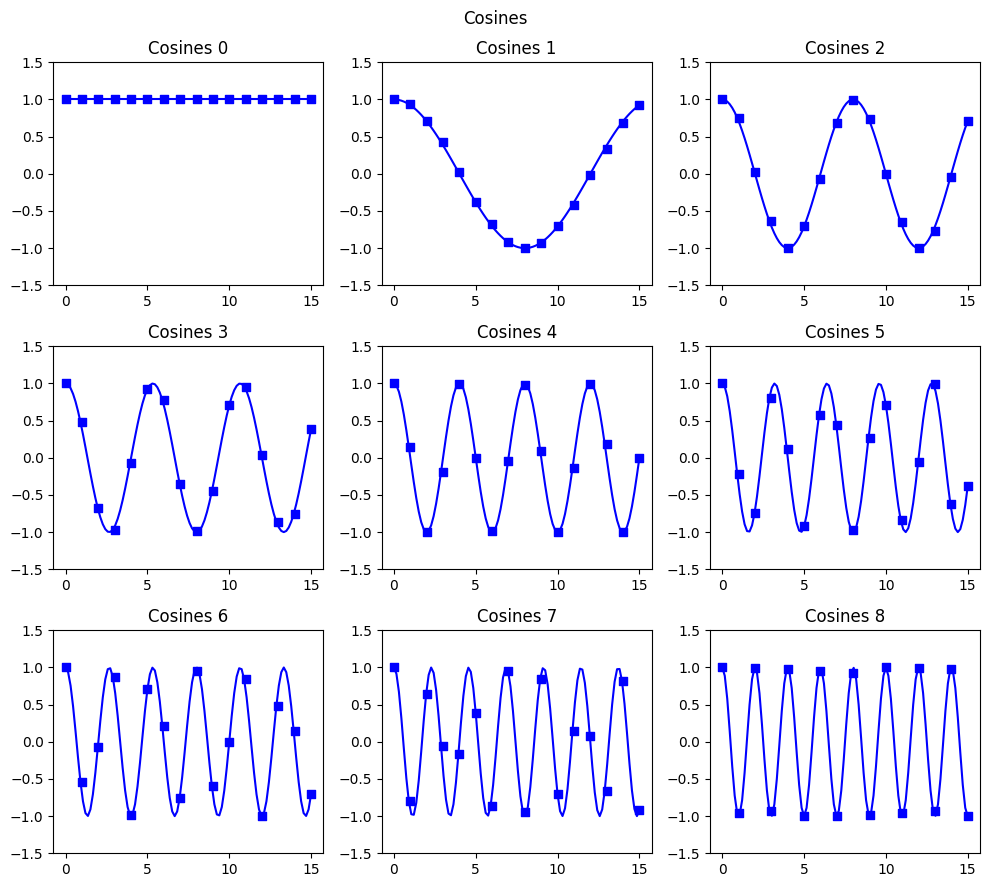

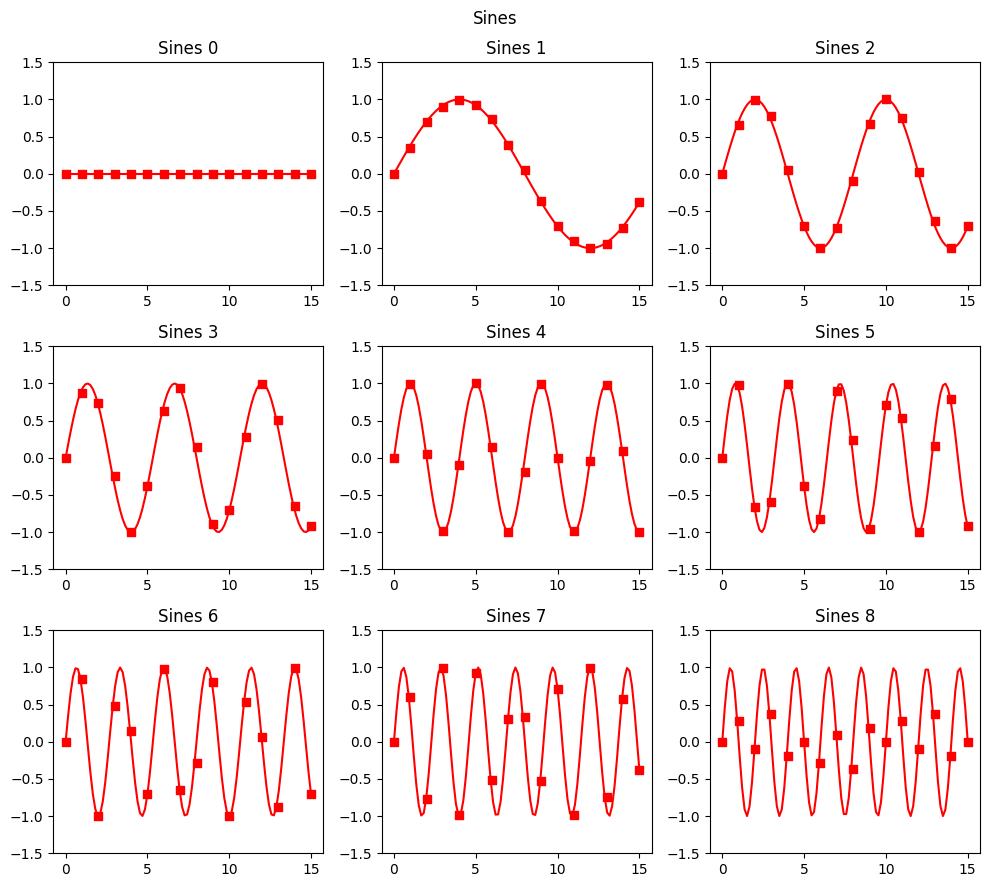

In [105]:
n = len(short_signal)
cosines = []
sines = []
# Increase the number of points
x = np.linspace(0, n - 1, 100)

for k in range(0, int(n / 2) + 1):
    cosines.append(np.cos(2 * np.pi * k * x / n))
    sines.append(np.sin(2 * np.pi * k * x / n))

plot_waves(cosines, "Cosines", "blue", n, minY=-1.5, maxY=1.5)
plot_waves(sines, "Sines", "red", n, minY=-1.5, maxY=1.5)


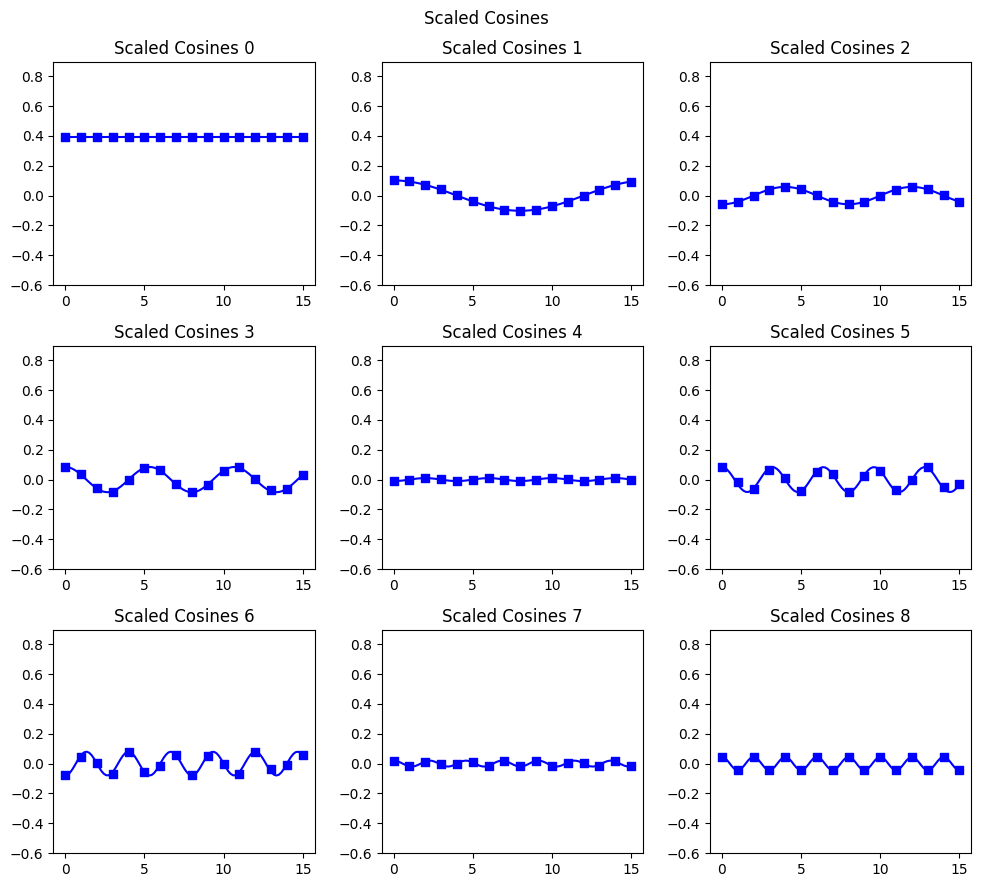

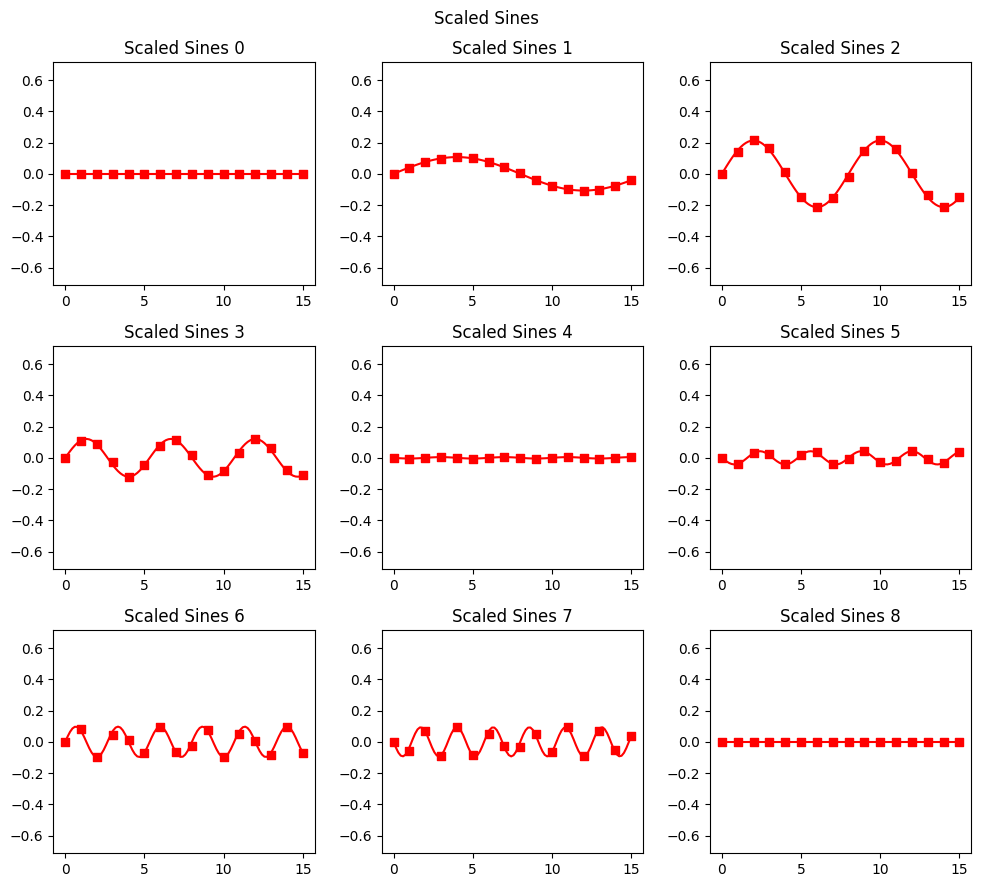

In [106]:
# now we get the cosine and sine coefficients
reX, imX = decompose_signal(short_signal)

# scale cosines and sines by reX and imX, respectively
# set up reX and imX for broadcasting (vector operations, which run faster)
reX_s = reX[:, np.newaxis]  # add a new axis to reX to make its shape (:, 1)
imX_s = imX[:, np.newaxis]  # add a new axis to imX to make its shape (:, 1)

# scale the cosines and store the minimum and maximum (for visualization)
scaled_cosines = [cosine * reX_s[i] for i, cosine in enumerate(cosines)]
min_cosine = min(min(sublist) for sublist in scaled_cosines)
max_cosine = max(max(sublist) for sublist in scaled_cosines)

# scale the sines and store the minimum and maximum (for visualization)
scaled_sines = [sine * imX_s[i] for i, sine in enumerate(sines)]
min_sine = min(min(sublist) for sublist in scaled_sines)
max_sine = max(max(sublist) for sublist in scaled_sines)

plot_waves(scaled_cosines, "Scaled Cosines", "blue",
           n, min_cosine - 0.5, max_cosine + 0.5)
plot_waves(scaled_sines, "Scaled Sines", "red", n, min_sine - 0.5,
           max_sine + 0.5)

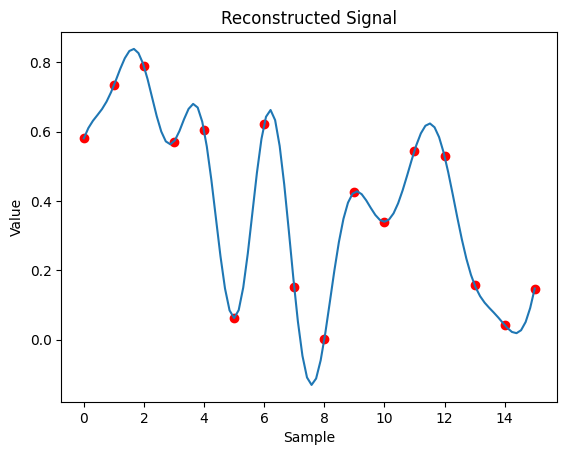

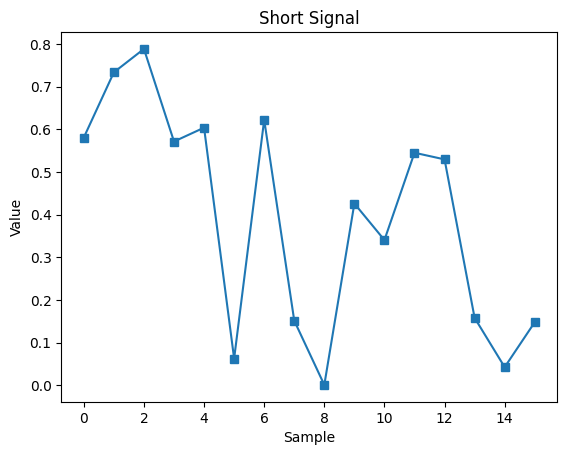

In [107]:
# now we can combine the cosines and sines and reconstruct the original signal
reconstructed_signal = np.zeros(len(cosines[0]))

for i in range(len(cosines)):
    reconstructed_signal += scaled_cosines[i] + scaled_sines[i]

x_values = np.linspace(0, n - 1, 100)

# plot the reconstructed signal
plt.plot(x_values, reconstructed_signal)  # Plot with markers for each point

# superimpose short_signal points using the generated x_values
plt.scatter(np.arange(len(short_signal)), short_signal, color='red', marker='o')
plt.xlabel("Sample")
plt.ylabel("Value")
plt.title("Reconstructed Signal")
plt.show()  # display the plot

# compare with the original
plt.plot(short_signal, marker="s")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.title("Short Signal")
plt.show()


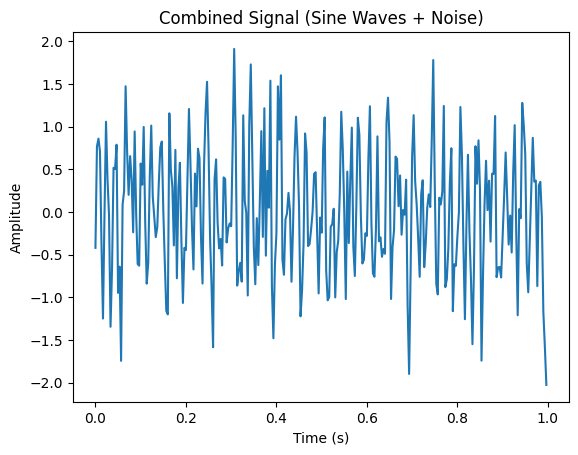

In [108]:
# signal parameters
duration = 1.0  # seconds
sampling_rate = 300  # Hz
frequency1 = 30  # Hz
frequency2 = 50 # Hz
amplitude = 1.0

# noise parameters
noise_amplitude = 0.5

# time array
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# generate sine wave
sine_wave1 = amplitude * np.sin(2 * np.pi * frequency1 * time)
sine_wave2 = amplitude * np.sin(2 * np.pi * frequency2 * time)
sine_wave = 0.3 * sine_wave1 + 0.7 * sine_wave2

# generate noise
noise = noise_amplitude * np.random.randn(len(time))

# combine sine wave and noise
signal = sine_wave + noise

# let's plot the signal
plt.plot(time, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Combined Signal (Sine Waves + Noise)")
plt.show()

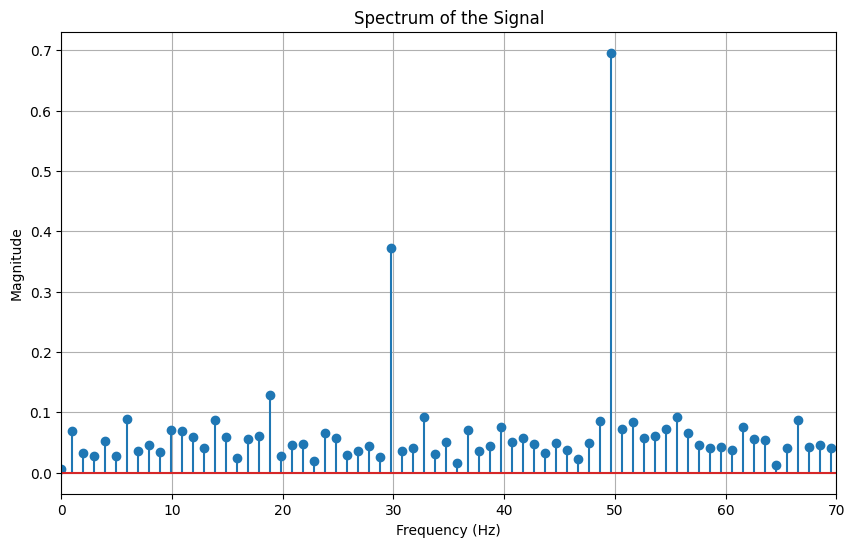

In [109]:
# let's compute the Fourier decomposition of this signal
reX, imX = decompose_signal(signal)

# we convert the sine and cosine coefficients into magnitude and phase
magnitude, phase = rectangular2Polar(reX, imX)

# now we can plot the spectrum
plot_spectrum(magnitude, sampling_rate, 70)

In [110]:
def apply_frequency_filter(signal, sampling_rate, cutoff_freq,
                           filter_type='lowpass'):
    """
    Apply a frequency filter to a sound sample using
    the Fourier transform.

    Parameters:
    signal (numpy.ndarray): The input sound signal.
    sampling_rate (int): The sampling rate of the signal.
    cutoff_freq (float or tuple): The cutoff frequency for the filter.
    filter_type (str): The type of filter ('lowpass', 'highpass', 'bandpass').

    Returns:
    numpy.ndarray: The filtered sound signal.
    """

    # Decompose the signal
    reX, imX = decompose_signal(signal)

    # Create the filter mask
    N = len(reX) * 2 - 2
    T = 1 / sampling_rate
    frequencies = np.arange(N) / (N * T)
    print(frequencies)

    if filter_type == 'lowpass':
        mask = np.abs(frequencies) <= cutoff_freq
    elif filter_type == 'highpass':
        mask = np.abs(frequencies) >= cutoff_freq
    elif filter_type == 'bandpass':
        mask = (np.abs(frequencies) >= cutoff_freq[0]) &\
        (np.abs(frequencies) <= cutoff_freq[1])
    else:
        raise ValueError("Invalid filter type. Use 'lowpass', 'highpass', or 'bandpass'.")

    # Apply the filter mask
    reX *= mask[:len(reX)]
    imX *= mask[:len(imX)]

    # Synthesize the signal back
    filtered_signal = synthesize_signal(reX, imX)

    return filtered_signal

In [111]:
def apply_frequency_filter_window(signal, sampling_rate, cutoff_freq,
                                  filter_type='lowpass', window_size=1024,
                                  overlap=0.5):
    """
    Applies a frequency filter to a sound sample in chunks using custom
    Fourier transform functions.

    Parameters:
    signal (numpy.ndarray): The input sound signal.
    sampling_rate (int): The sampling rate of the signal.
    cutoff_freq (float or tuple): The cutoff frequency for the filter.
    filter_type (str): The type of filter ('lowpass', 'highpass', 'bandpass').
    window_size (int): The size of each window (chunk).
    overlap (float): The fraction of overlap between windows (0.0 to 1.0).

    Returns:
    numpy.ndarray: The filtered sound signal.
    """

    step_size = int(window_size * (1 - overlap))
    n_windows = (len(signal) - window_size) // step_size + 1

    filtered_signal = np.zeros(len(signal))
    window = np.hanning(window_size)  # Apply a Hanning window to each chunk

    for i in range(n_windows):
        start = i * step_size
        end = start + window_size
        chunk = signal[start:end] * window

        # Decompose the signal
        reX, imX = decompose_signal(chunk)

        # Create the filter mask
        N = len(reX) * 2 - 2
        frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

        if filter_type == 'lowpass':
            mask = np.abs(frequencies) <= cutoff_freq
        elif filter_type == 'highpass':
            mask = np.abs(frequencies) >= cutoff_freq
        elif filter_type == 'bandpass':
            mask = (np.abs(frequencies) >= cutoff_freq[0]) &\
             (np.abs(frequencies) <= cutoff_freq[1])
        else:
            raise ValueError("Invalid filter type. Use 'lowpass', 'highpass', or 'bandpass'.")

        # Apply the filter mask
        reX *= mask[:len(reX)]
        imX *= mask[:len(imX)]

        # Synthesize the signal back
        filtered_chunk = synthesize_signal(reX, imX) * window

        # Overlap-add method to reconstruct the signal
        filtered_signal[start:end] += filtered_chunk

    return filtered_signal

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


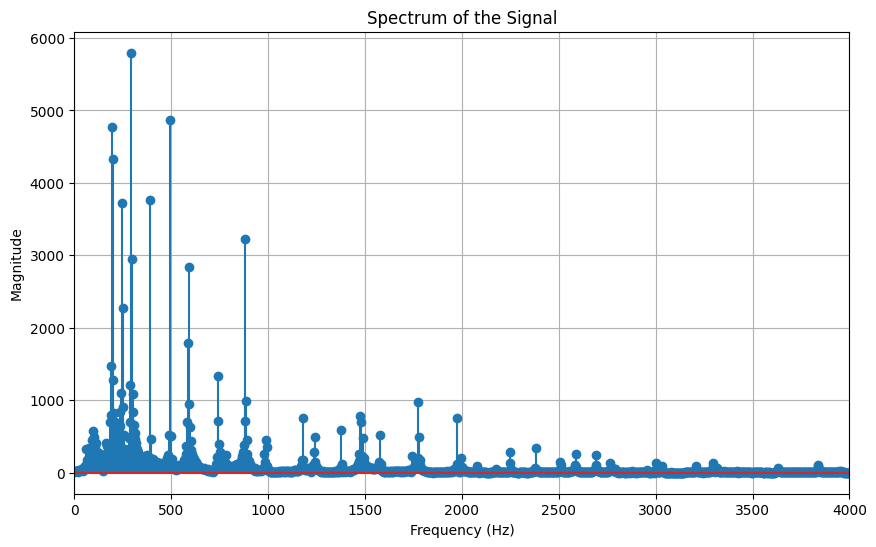

Top 6 peaks for mystery_chord_clip.wav:
  Frequency: 292.78 Hz, Magnitude: 5795.77
  Frequency: 494.07 Hz, Magnitude: 4867.32
  Frequency: 193.97 Hz, Magnitude: 4766.47
  Frequency: 197.63 Hz, Magnitude: 4333.52
  Frequency: 391.59 Hz, Magnitude: 3768.27
  Frequency: 245.20 Hz, Magnitude: 3715.68
------------------------------


In [112]:
from google.colab import drive
import io
import wave
from IPython.display import Audio
import os
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

# Mount Google Drive
drive.mount('/content/drive')

# Specify the folder path in your Google Drive where the audio files are located
folder_path = '/content/drive/My Drive/Colab Notebooks/sound_clips' # <--- **UPDATE THIS PATH**

audio_files = []
audio_data_list = []
sample_rates = []

# Iterate through files in the specified folder
for filename in os.listdir(folder_path):
    # Only process the specified file
    if filename == 'mystery_chord_clip.wav':
        file_path = os.path.join(folder_path, filename)
        if filename.endswith('.wav'):
            try:
                # Open the wav file
                with wave.open(file_path, 'rb') as wav_file:
                    sample_rate = wav_file.getframerate()
                    audio_data = np.frombuffer(wav_file.readframes(-1), dtype=np.int16)
                    audio_files.append(filename)
                    audio_data_list.append(audio_data)
                    sample_rates.append(sample_rate)

                # --- Fourier decomposition ---
                reX, imX = decompose_signal(audio_data)
                magnitude, phase = rectangular2Polar(reX, imX)

                # --- Plot the spectrum ---
                plot_spectrum(magnitude, sample_rate, max_x=4000)

                # --- Find and print top 6 peaks ---
                top_peaks = peak_finder(magnitude, sample_rate, n=6)
                print(f"Top 6 peaks for {filename}:")
                for freq, mag in top_peaks:
                    print(f"  Frequency: {freq:.2f} Hz, Magnitude: {mag:.2f}")
                print("-" * 30)

            except Exception as e:
                print(f"Error processing WAV file {filename}: {e}")

In [115]:
# apply a filter
filt_data = apply_frequency_filter_window(audio_data, wav_file.getframerate(),
                                          400, 'highpass')


# Play the audio
Audio(audio_data, rate=sample_rate)

# Analyzing Mystery Cord Clip

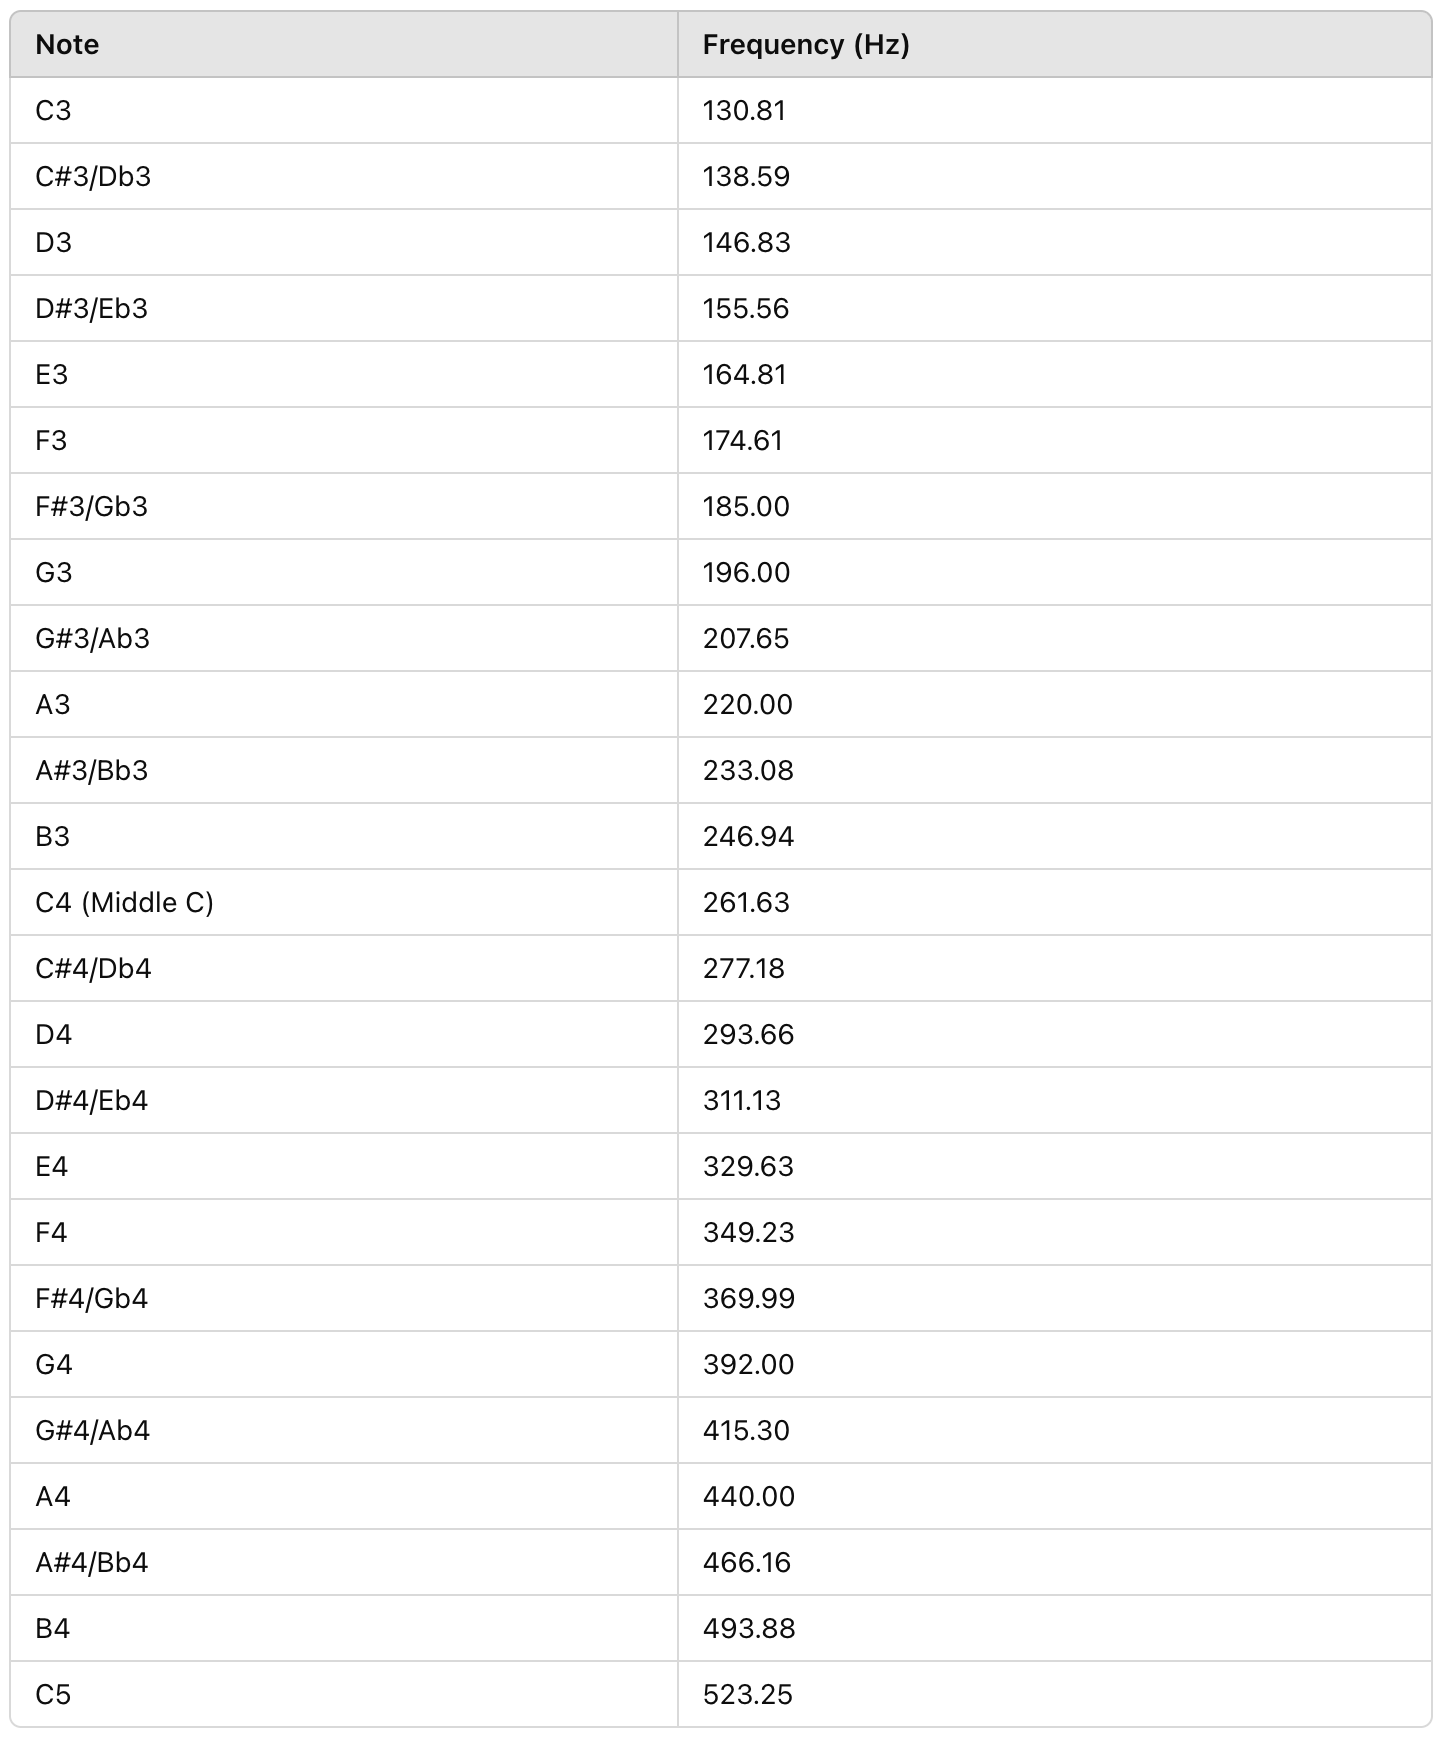


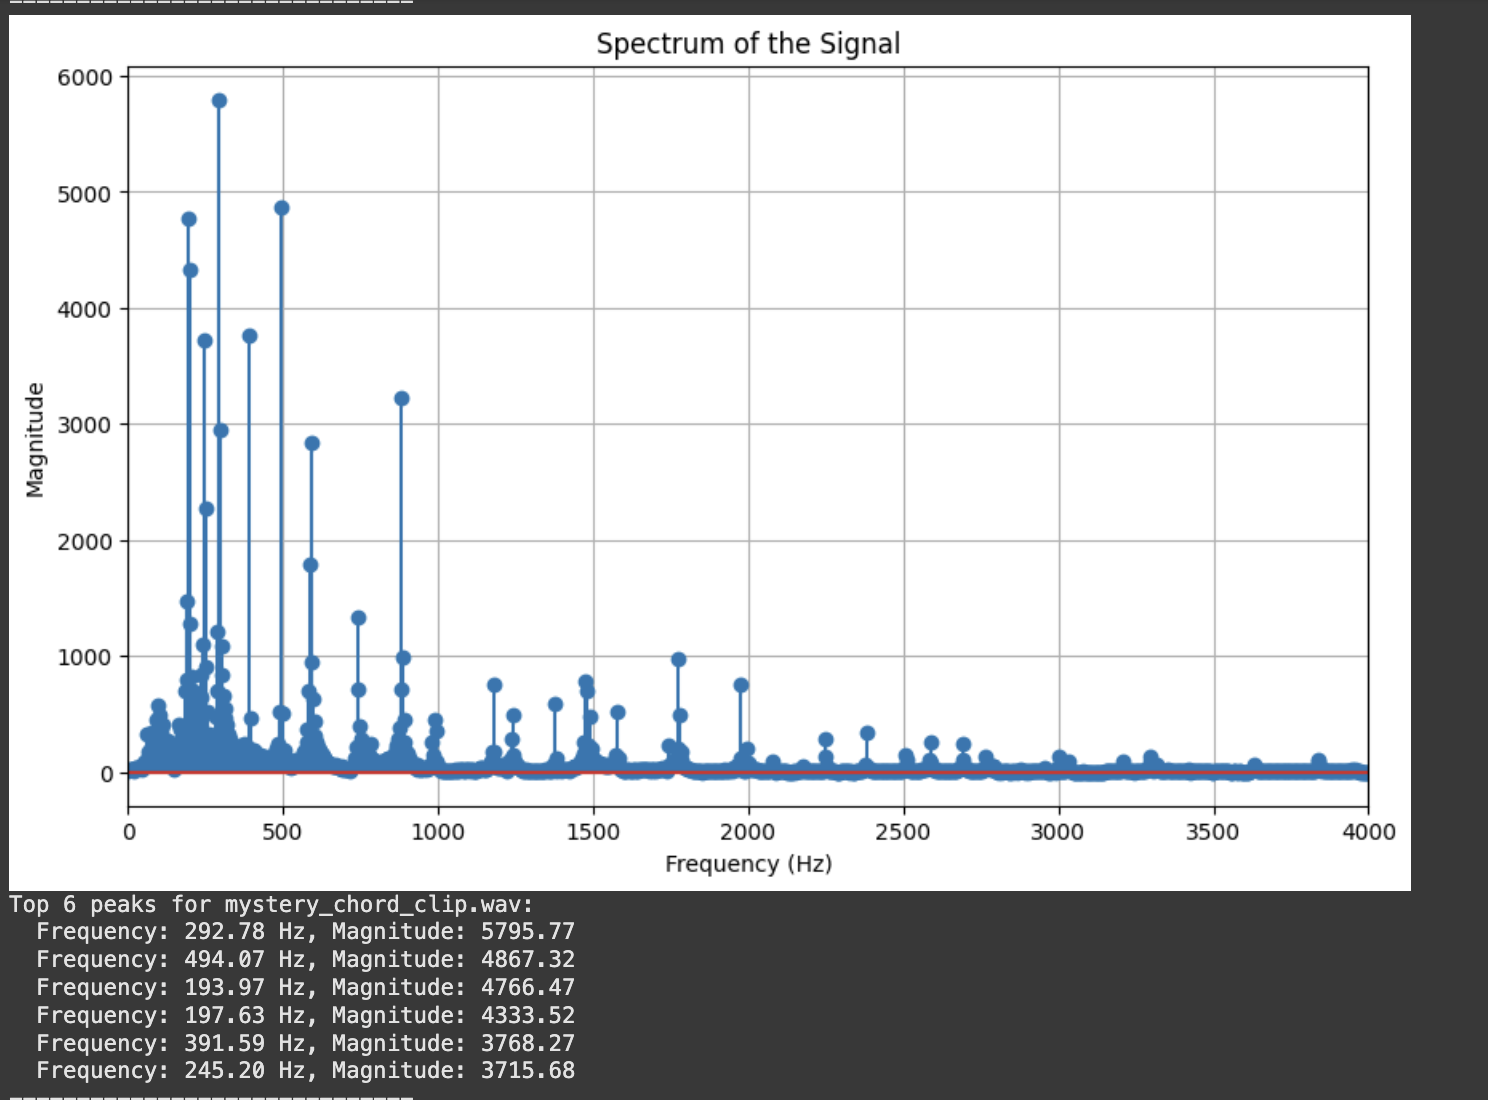

The top 6 frequencies are:

*   Frequency: 292.78 Hz
*   Frequency: 494.07 Hz
*   Frequency: 193.97 Hz
*   Frequency: 197.63 Hz
*   Frequency: 391.59 Hz
*   Frequency: 245.20 Hz

Comparing these frequencies to the note-frequency chart in the provided above, it is possible for us to guess the cords in the clip. The main notes seem to be around 194 to 198 Hz, 245 Hz, and 293 Hz. These notes correspond to G₃, B, and D₄, respectively. The higher peak of 494.07 Hz and 391.59 Hz are about twice of the lower frequencies,, which I am guessing are harmonics (octaves) of lower notes. As discussed in class is common in real instrument sounds. Therefore, the chord most likely contains the notes G, B, and D (creating a G major cord).